# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 05.11.2020

Мягкий дедлайн: 01:59MSK 18.11.2019

Жесткий дедлайн: 01:59MSK 22.11.2019

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/21899 нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__ 10+1

https://contest.yandex.ru/contest/21899/problems/A/

https://contest.yandex.ru/contest/21899/problems/B/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

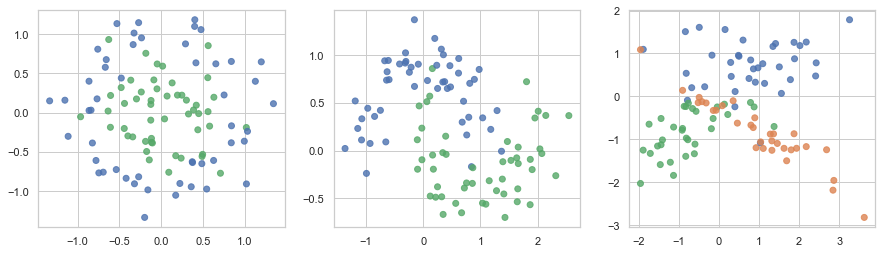

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

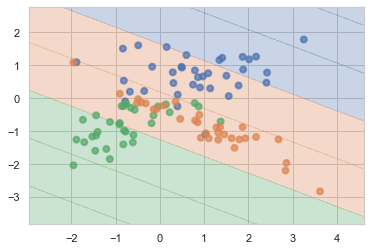

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

0 dataset, accuracy on test: 0.76
0 dataset, accuracy on train: 1.0


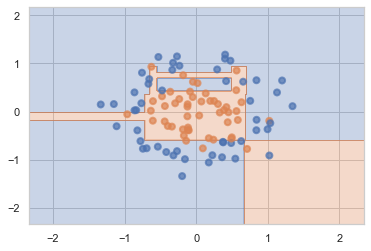

In [9]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.metrics import accuracy_score
X, y = datasets[0]
X_train, X_test, y_train, y_test = train_test_split(
         X, y)
clf  = DecisionTreeClassifier().fit(X_train, y_train)
plot_surface(clf, X, y)
print(f'0 dataset, accuracy on test: {accuracy_score(y_test, clf.predict(X_test))}')
print(f'0 dataset, accuracy on train: {accuracy_score(y_train, clf.predict(X_train))}')

1 dataset, accuracy on test: 0.84
1 dataset, accuracy on train: 1.0


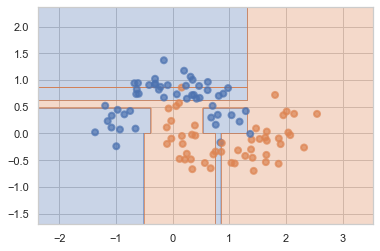

In [10]:
X, y = datasets[1]
X_train, X_test, y_train, y_test = train_test_split(
         X, y)
clf  = DecisionTreeClassifier().fit(X_train, y_train)
plot_surface(clf, X, y)
print(f'1 dataset, accuracy on test: {accuracy_score(y_test, clf.predict(X_test))}')
print(f'1 dataset, accuracy on train: {accuracy_score(y_train, clf.predict(X_train))}')

2 dataset, accuracy on test: 0.8
2 dataset, accuracy on train: 1.0


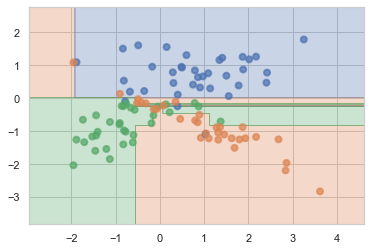

In [11]:
X, y = datasets[2]
X_train, X_test, y_train, y_test = train_test_split(
         X, y)
clf  = DecisionTreeClassifier().fit(X_train, y_train)
plot_surface(clf, X, y)
print(f'2 dataset, accuracy on test: {accuracy_score(y_test, clf.predict(X_test))}')
print(f'2 dataset, accuracy on train: {accuracy_score(y_train, clf.predict(X_train))}')

__Ответ:__ Хз, можно ли назвать это переобучением. Типо данных так мало, что не ясно. Т.е. с одной стороны accuracy=1 на трейне говорит о том, что это явно переобучение. С другой стороны, accuracy на тесте не сильно падает, а разделяющие линии вполне адекватные, хотя нет, это только на одном датасете. В общем, наверное сильно переобучилить, потому что вот этих узких длинных полос быть не должно. Ну оно и логично, объем трейна - 75.

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

md - max_depth, msl - min_samples_leaf


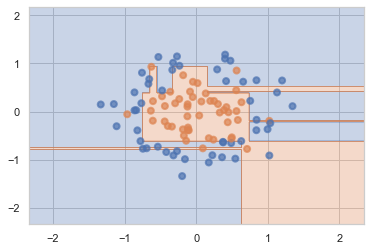

md: 10, msl: 1, mistake on test: 0.28
md: 10, msl: 1, mistake on train: 0.0


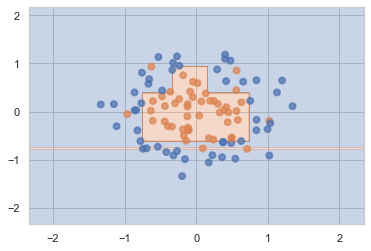

md: 10, msl: 2, mistake on test: 0.24
md: 10, msl: 2, mistake on train: 0.040000000000000036


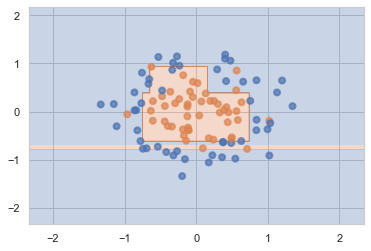

md: 10, msl: 3, mistake on test: 0.24
md: 10, msl: 3, mistake on train: 0.053333333333333344


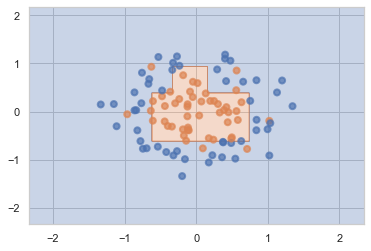

md: 10, msl: 4, mistake on test: 0.16000000000000003
md: 10, msl: 4, mistake on train: 0.07999999999999996


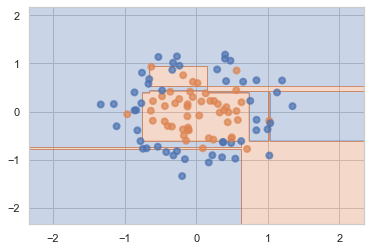

md: 8, msl: 1, mistake on test: 0.28
md: 8, msl: 1, mistake on train: 0.0


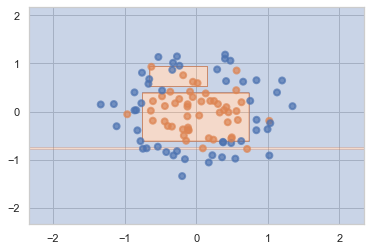

md: 8, msl: 2, mistake on test: 0.28
md: 8, msl: 2, mistake on train: 0.040000000000000036


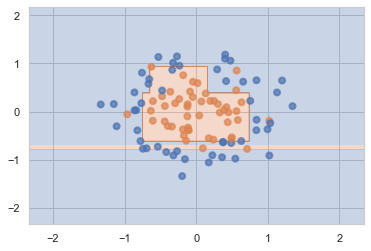

md: 8, msl: 3, mistake on test: 0.24
md: 8, msl: 3, mistake on train: 0.053333333333333344


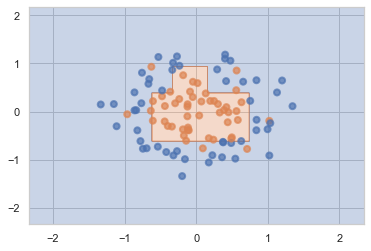

md: 8, msl: 4, mistake on test: 0.16000000000000003
md: 8, msl: 4, mistake on train: 0.07999999999999996


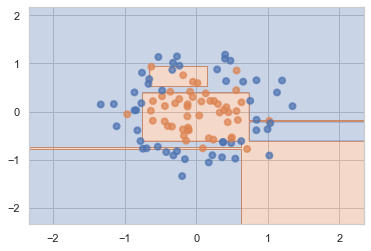

md: 6, msl: 1, mistake on test: 0.31999999999999995
md: 6, msl: 1, mistake on train: 0.026666666666666616


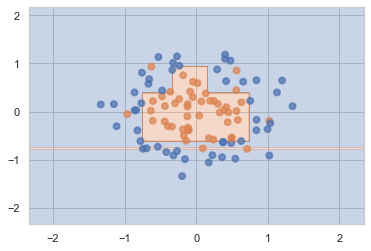

md: 6, msl: 2, mistake on test: 0.24
md: 6, msl: 2, mistake on train: 0.040000000000000036


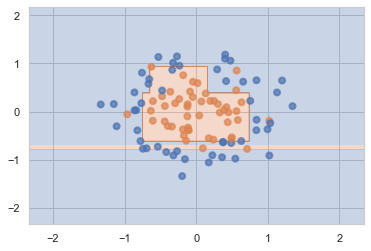

md: 6, msl: 3, mistake on test: 0.24
md: 6, msl: 3, mistake on train: 0.053333333333333344


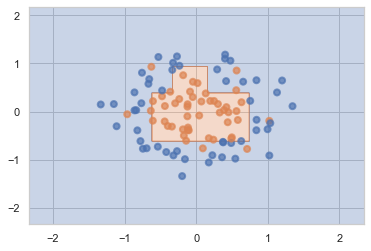

md: 6, msl: 4, mistake on test: 0.16000000000000003
md: 6, msl: 4, mistake on train: 0.07999999999999996


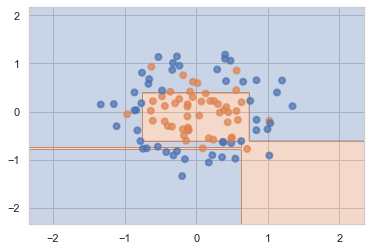

md: 4, msl: 1, mistake on test: 0.28
md: 4, msl: 1, mistake on train: 0.09333333333333338


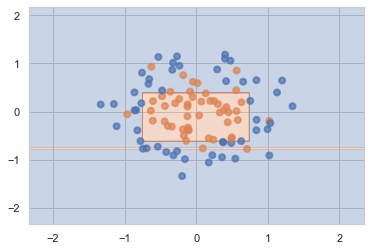

md: 4, msl: 2, mistake on test: 0.24
md: 4, msl: 2, mistake on train: 0.09333333333333338


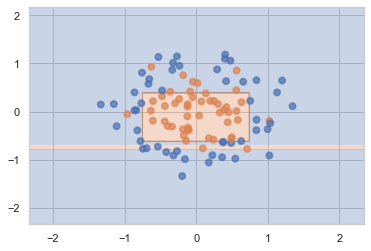

md: 4, msl: 3, mistake on test: 0.24
md: 4, msl: 3, mistake on train: 0.10666666666666669


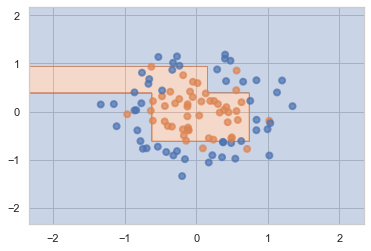

md: 4, msl: 4, mistake on test: 0.19999999999999996
md: 4, msl: 4, mistake on train: 0.12


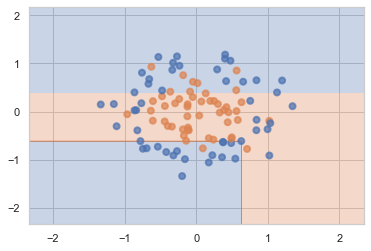

md: 2, msl: 1, mistake on test: 0.4
md: 2, msl: 1, mistake on train: 0.19999999999999996


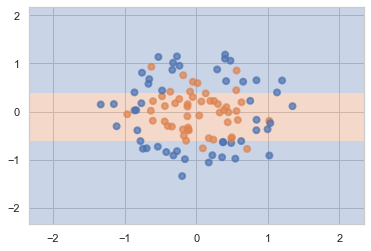

md: 2, msl: 2, mistake on test: 0.36
md: 2, msl: 2, mistake on train: 0.21333333333333337


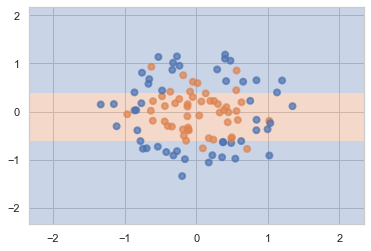

md: 2, msl: 3, mistake on test: 0.36
md: 2, msl: 3, mistake on train: 0.21333333333333337


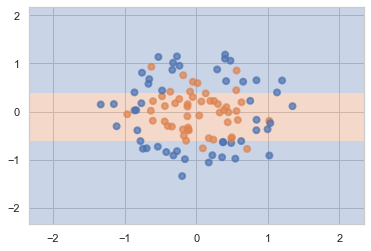

md: 2, msl: 4, mistake on test: 0.36
md: 2, msl: 4, mistake on train: 0.21333333333333337


In [28]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# 0 dataset
from sklearn.utils.extmath import cartesian
X, y = datasets[0]
X_train, X_test, y_train, y_test = train_test_split(X, y)
print('md - max_depth, msl - min_samples_leaf')
for md, msl in cartesian((np.arange(10, 0, -2), np.arange(1, 5))):
    clf  = DecisionTreeClassifier(max_depth=md, min_samples_leaf=msl).fit(X_train, y_train)
    plot_surface(clf, X, y)
    plt.show()
    print(f'md: {md}, msl: {msl}, mistake on test: {1 - accuracy_score(y_test, clf.predict(X_test))}')
    print(f'md: {md}, msl: {msl}, mistake on train: {1 - accuracy_score(y_train, clf.predict(X_train))}')

md - max_depth, msl - min_samples_leaf


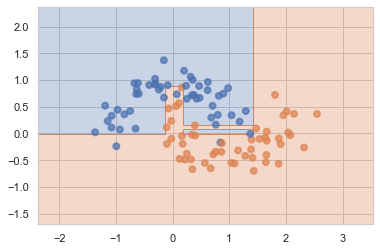

md: 10, msl: 1, mistake on test: 0.12
md: 10, msl: 1, mistake on train: 0.0


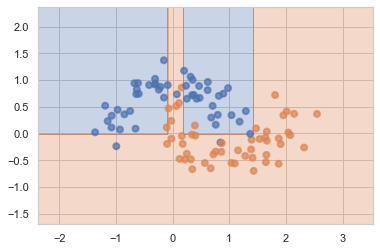

md: 10, msl: 2, mistake on test: 0.12
md: 10, msl: 2, mistake on train: 0.026666666666666616


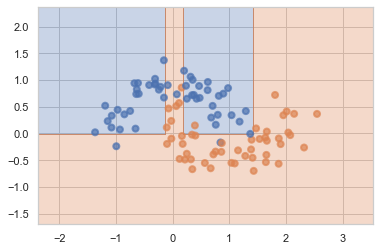

md: 10, msl: 3, mistake on test: 0.12
md: 10, msl: 3, mistake on train: 0.026666666666666616


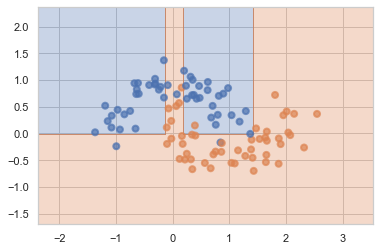

md: 10, msl: 4, mistake on test: 0.12
md: 10, msl: 4, mistake on train: 0.026666666666666616


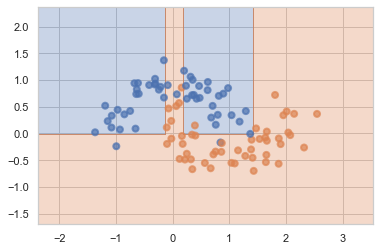

md: 10, msl: 5, mistake on test: 0.12
md: 10, msl: 5, mistake on train: 0.026666666666666616


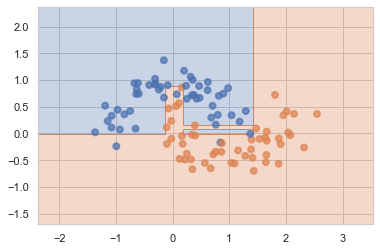

md: 8, msl: 1, mistake on test: 0.12
md: 8, msl: 1, mistake on train: 0.0


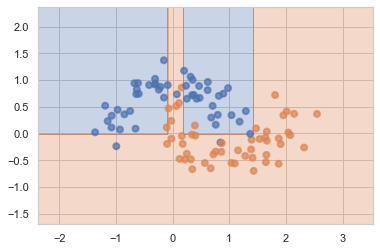

md: 8, msl: 2, mistake on test: 0.12
md: 8, msl: 2, mistake on train: 0.026666666666666616


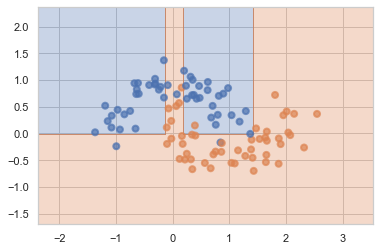

md: 8, msl: 3, mistake on test: 0.12
md: 8, msl: 3, mistake on train: 0.026666666666666616


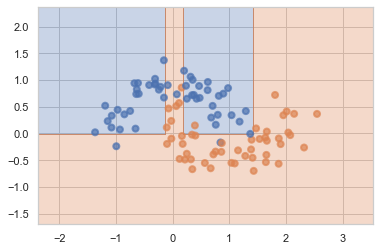

md: 8, msl: 4, mistake on test: 0.12
md: 8, msl: 4, mistake on train: 0.026666666666666616


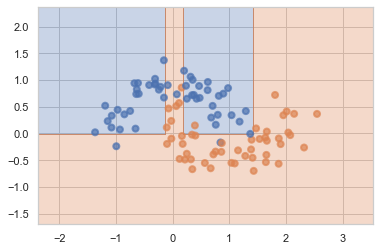

md: 8, msl: 5, mistake on test: 0.12
md: 8, msl: 5, mistake on train: 0.026666666666666616


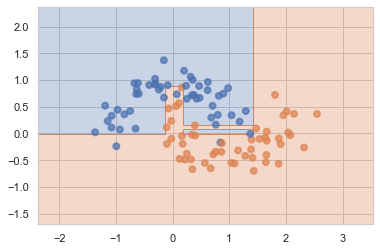

md: 6, msl: 1, mistake on test: 0.12
md: 6, msl: 1, mistake on train: 0.0


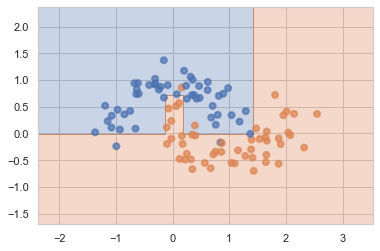

md: 6, msl: 2, mistake on test: 0.07999999999999996
md: 6, msl: 2, mistake on train: 0.026666666666666616


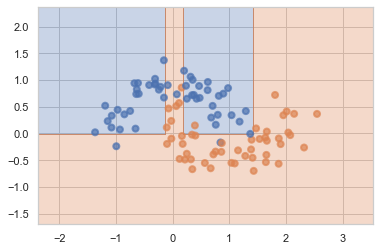

md: 6, msl: 3, mistake on test: 0.12
md: 6, msl: 3, mistake on train: 0.026666666666666616


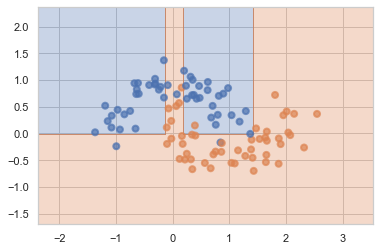

md: 6, msl: 4, mistake on test: 0.12
md: 6, msl: 4, mistake on train: 0.026666666666666616


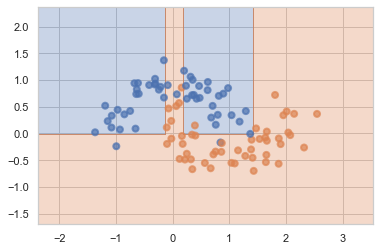

md: 6, msl: 5, mistake on test: 0.12
md: 6, msl: 5, mistake on train: 0.026666666666666616


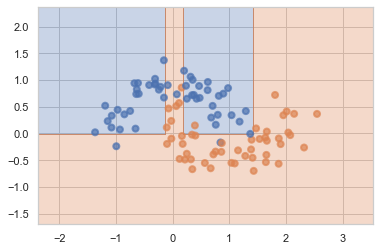

md: 4, msl: 1, mistake on test: 0.12
md: 4, msl: 1, mistake on train: 0.026666666666666616


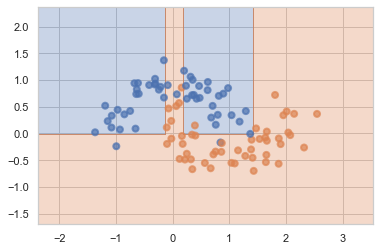

md: 4, msl: 2, mistake on test: 0.12
md: 4, msl: 2, mistake on train: 0.026666666666666616


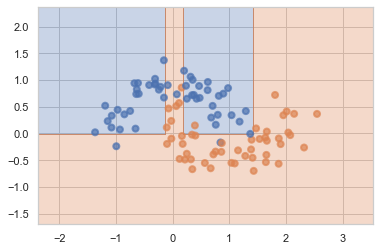

md: 4, msl: 3, mistake on test: 0.12
md: 4, msl: 3, mistake on train: 0.026666666666666616


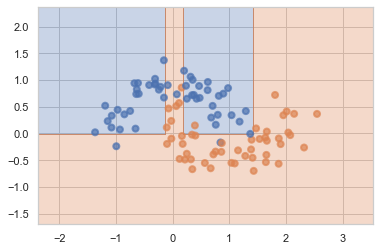

md: 4, msl: 4, mistake on test: 0.12
md: 4, msl: 4, mistake on train: 0.026666666666666616


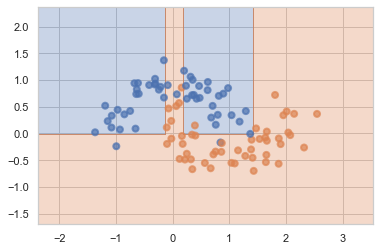

md: 4, msl: 5, mistake on test: 0.12
md: 4, msl: 5, mistake on train: 0.026666666666666616


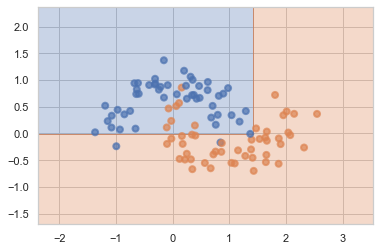

md: 2, msl: 1, mistake on test: 0.07999999999999996
md: 2, msl: 1, mistake on train: 0.09333333333333338


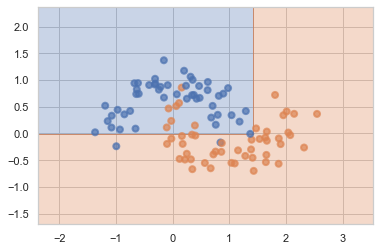

md: 2, msl: 2, mistake on test: 0.07999999999999996
md: 2, msl: 2, mistake on train: 0.09333333333333338


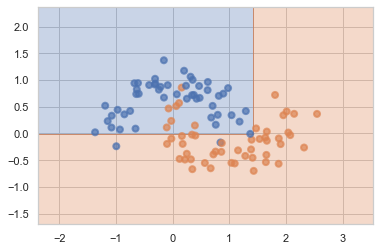

md: 2, msl: 3, mistake on test: 0.07999999999999996
md: 2, msl: 3, mistake on train: 0.09333333333333338


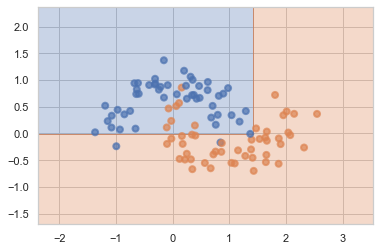

md: 2, msl: 4, mistake on test: 0.07999999999999996
md: 2, msl: 4, mistake on train: 0.09333333333333338


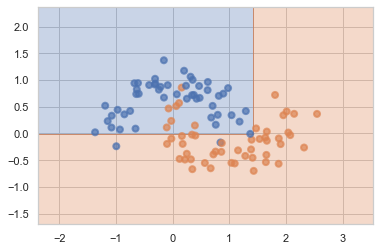

md: 2, msl: 5, mistake on test: 0.07999999999999996
md: 2, msl: 5, mistake on train: 0.09333333333333338


In [30]:
# 1 dataset
X, y = datasets[1]
X_train, X_test, y_train, y_test = train_test_split(X, y)
print('md - max_depth, msl - min_samples_leaf')
for md, msl in cartesian((np.arange(10, 0, -2), np.arange(1, 6))):
    clf  = DecisionTreeClassifier(max_depth=md, min_samples_leaf=msl).fit(X_train, y_train)
    plot_surface(clf, X, y)
    plt.show()
    print(f'md: {md}, msl: {msl}, mistake on test: {1 - accuracy_score(y_test, clf.predict(X_test))}')
    print(f'md: {md}, msl: {msl}, mistake on train: {1 - accuracy_score(y_train, clf.predict(X_train))}')

md - max_depth, msl - min_samples_leaf


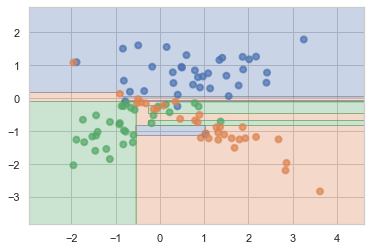

md: 10, msl: 1, mistake on test: 0.31999999999999995
md: 10, msl: 1, mistake on train: 0.0


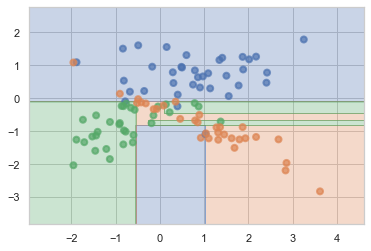

md: 10, msl: 2, mistake on test: 0.24
md: 10, msl: 2, mistake on train: 0.053333333333333344


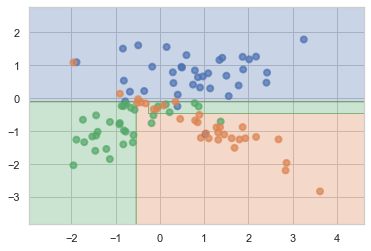

md: 10, msl: 3, mistake on test: 0.24
md: 10, msl: 3, mistake on train: 0.07999999999999996


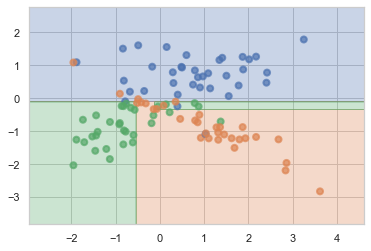

md: 10, msl: 4, mistake on test: 0.19999999999999996
md: 10, msl: 4, mistake on train: 0.09333333333333338


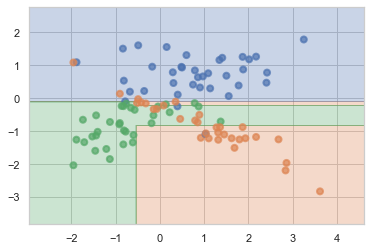

md: 10, msl: 5, mistake on test: 0.28
md: 10, msl: 5, mistake on train: 0.09333333333333338


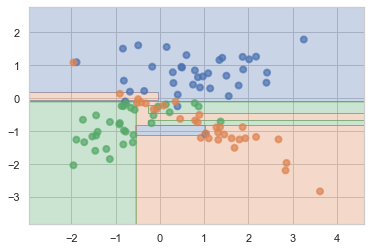

md: 8, msl: 1, mistake on test: 0.31999999999999995
md: 8, msl: 1, mistake on train: 0.0


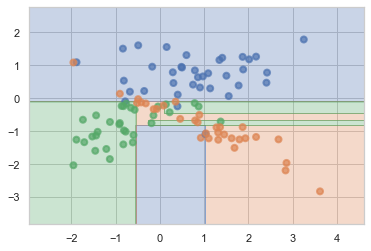

md: 8, msl: 2, mistake on test: 0.24
md: 8, msl: 2, mistake on train: 0.053333333333333344


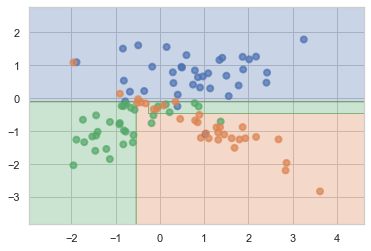

md: 8, msl: 3, mistake on test: 0.24
md: 8, msl: 3, mistake on train: 0.07999999999999996


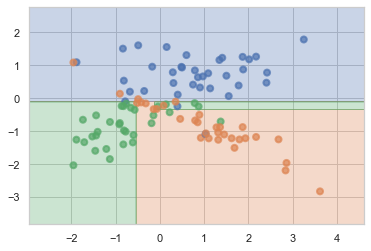

md: 8, msl: 4, mistake on test: 0.19999999999999996
md: 8, msl: 4, mistake on train: 0.09333333333333338


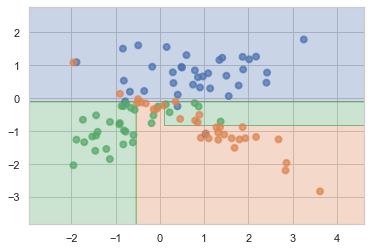

md: 8, msl: 5, mistake on test: 0.24
md: 8, msl: 5, mistake on train: 0.09333333333333338


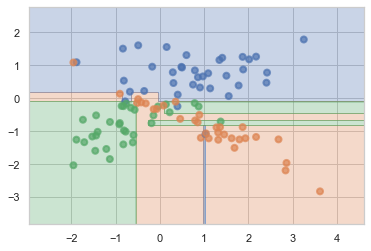

md: 6, msl: 1, mistake on test: 0.24
md: 6, msl: 1, mistake on train: 0.013333333333333308


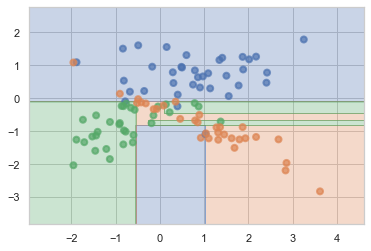

md: 6, msl: 2, mistake on test: 0.24
md: 6, msl: 2, mistake on train: 0.053333333333333344


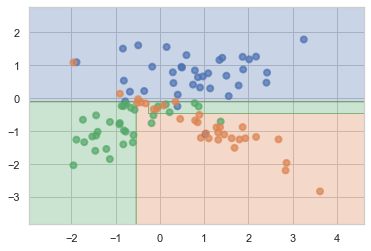

md: 6, msl: 3, mistake on test: 0.24
md: 6, msl: 3, mistake on train: 0.07999999999999996


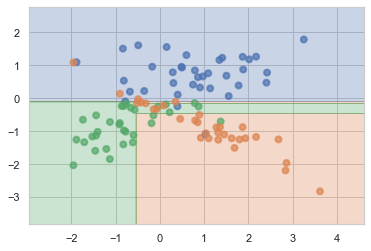

md: 6, msl: 4, mistake on test: 0.24
md: 6, msl: 4, mistake on train: 0.09333333333333338


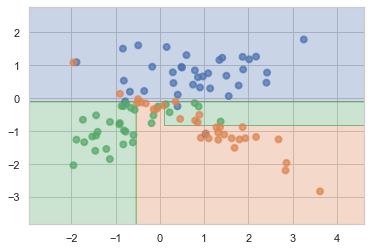

md: 6, msl: 5, mistake on test: 0.24
md: 6, msl: 5, mistake on train: 0.09333333333333338


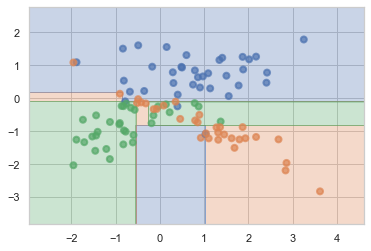

md: 4, msl: 1, mistake on test: 0.28
md: 4, msl: 1, mistake on train: 0.06666666666666665


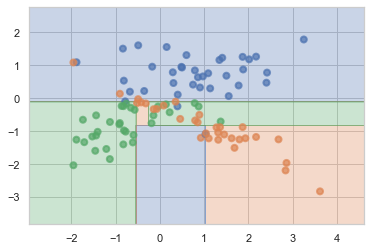

md: 4, msl: 2, mistake on test: 0.28
md: 4, msl: 2, mistake on train: 0.07999999999999996


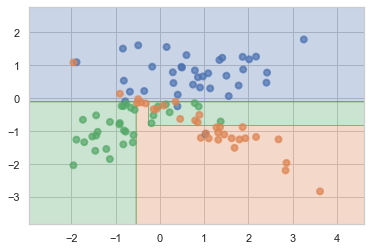

md: 4, msl: 3, mistake on test: 0.28
md: 4, msl: 3, mistake on train: 0.07999999999999996


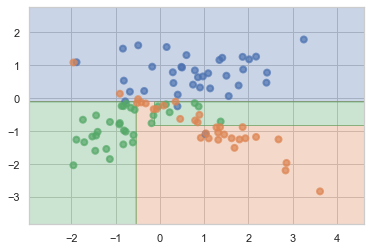

md: 4, msl: 4, mistake on test: 0.28
md: 4, msl: 4, mistake on train: 0.09333333333333338


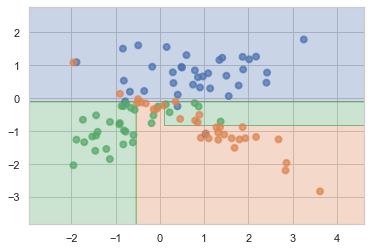

md: 4, msl: 5, mistake on test: 0.24
md: 4, msl: 5, mistake on train: 0.09333333333333338


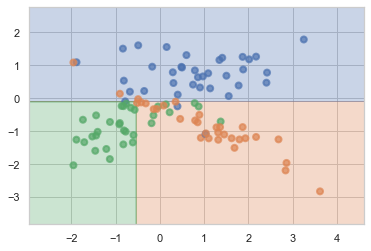

md: 2, msl: 1, mistake on test: 0.16000000000000003
md: 2, msl: 1, mistake on train: 0.1333333333333333


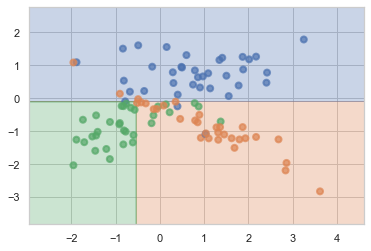

md: 2, msl: 2, mistake on test: 0.16000000000000003
md: 2, msl: 2, mistake on train: 0.1333333333333333


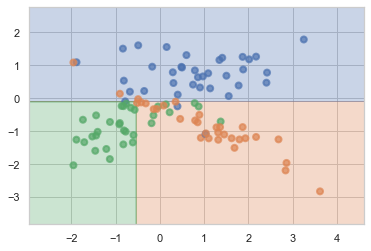

md: 2, msl: 3, mistake on test: 0.16000000000000003
md: 2, msl: 3, mistake on train: 0.1333333333333333


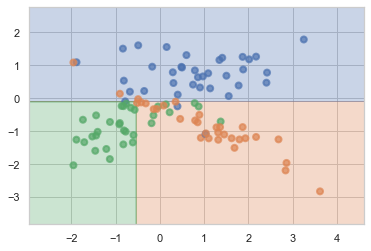

md: 2, msl: 4, mistake on test: 0.16000000000000003
md: 2, msl: 4, mistake on train: 0.1333333333333333


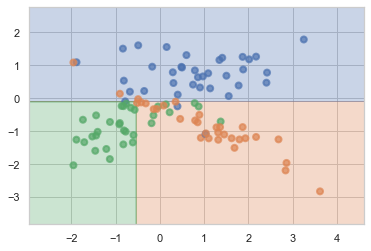

md: 2, msl: 5, mistake on test: 0.16000000000000003
md: 2, msl: 5, mistake on train: 0.1333333333333333


In [31]:
# 2 dataset
X, y = datasets[2]
X_train, X_test, y_train, y_test = train_test_split(X, y)
print('md - max_depth, msl - min_samples_leaf')
for md, msl in cartesian((np.arange(10, 0, -2), np.arange(1, 6))):
    clf  = DecisionTreeClassifier(max_depth=md, min_samples_leaf=msl).fit(X_train, y_train)
    plot_surface(clf, X, y)
    plt.show()
    print(f'md: {md}, msl: {msl}, mistake on test: {1 - accuracy_score(y_test, clf.predict(X_test))}')
    print(f'md: {md}, msl: {msl}, mistake on train: {1 - accuracy_score(y_train, clf.predict(X_train))}')

__Ответ:__
Сначала про min_samples_leaf.
Видно, что при увеличении этого параметра, уменьшается количество узких длинных линий - признаков переобучения. Да и вообще лишних искажений ожидаемой поверхности (это хорошо видно на 0 и 2 датасетах). Ну оно и логично: у нас нельзя разбивать вершины, в которых уже сколько-то объектов, поэтому мы не делим то, что делить уже будет переобучением.
Тут, я бы сказал, для всех датасетов тренд улучшения модели в зависимости от изменения параметра одинаковый.
Теперь про max_depth.
На 1 и 2 датасетах наименьшая ошибка на наименьших значениях max_depth. По сути эта штука запрещает строить слишеом слодные конструкции, поэтому модели ничего не остается, кроме как хорошо подогнать простую конструкцию. Ну и в некоторых случаях это оказывается лучше. На 0 датасете это не очень работает, потому что там, чем круглее, тем лучше. А круг-сложная конструкция с т.з. линий.
Тут видно, что 1 и 2 датасету эта штука помогает, а 0 не очень

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [2]:
%reload_ext autoreload

In [4]:
%autoreload 2
from hw5code import find_best_split
from hw5code import DecisionTree

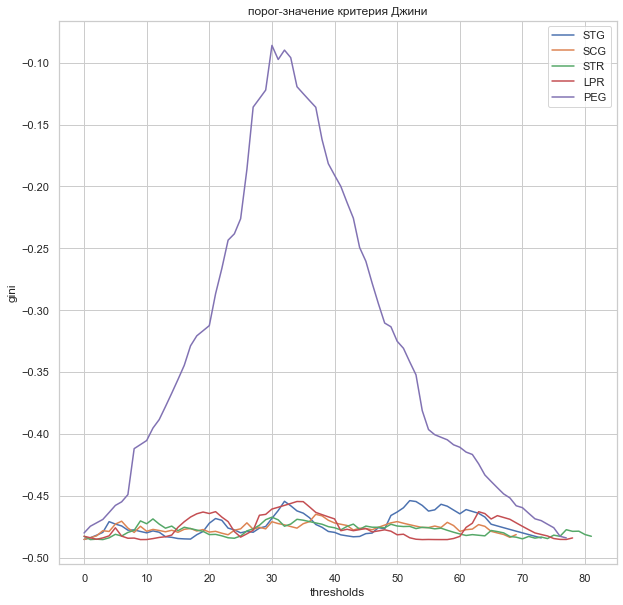

In [13]:
df = pd.read_csv('students.csv')
plt.figure(figsize=(10, 10))
plt.title('порог-значение критерия Джини')
for col in df.columns[:-1]:
    plt.plot(find_best_split(df[col], df[' UNS'])[1], label=col)
plt.legend()
plt.xlabel('thresholds')
plt.ylabel('gini')
plt.show()

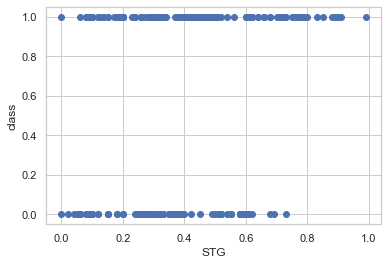

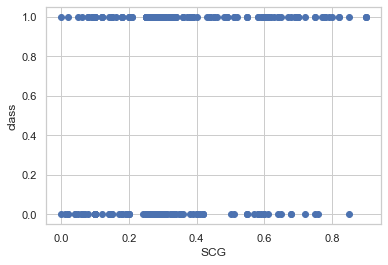

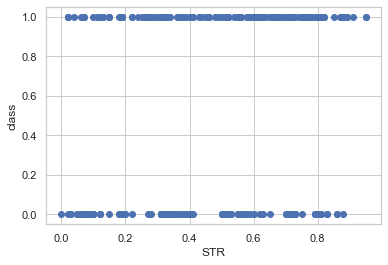

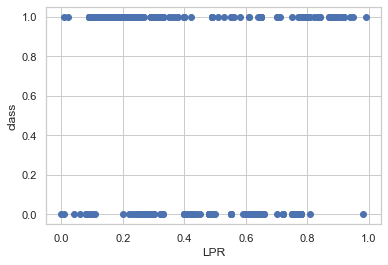

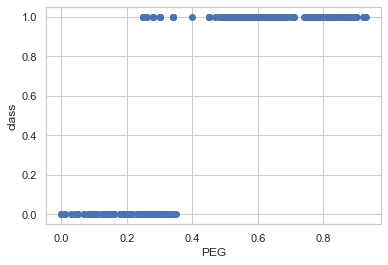

In [14]:
for col in df.columns[:-1]:
    plt.scatter(x=df[col], y=df[' UNS'])
    plt.xlabel(col)
    plt.ylabel('class')
    plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Очев, по PEG - это видно по симметричной высокой горке на первом графике (то есть на этом признаке в его вершине gini) максимален, и по скаттерам - там четенько маленькие значения признаков соответствуют 0 классу и наоборот. Поэтому согласуется.

Ну идеальный гини это 0 (так как p0 = 0 или p1 = 0). Поэтому кривая для хорошего признака должна быстро возрастать, к какому-то порогу становиться близкой к 0, а потом снова убывать. Симметричной она быть не обязана. 

Кривые для плохих признаков должны иметь схожие гини для любого разбиения. Так как доли одинаковы (в силу хреновости признаков) => H(R_l) = H(R_r) = const => H(R) = const. Поэтому кривая - ровная линия, идущая по дну.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [15]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# Я не понял, зачем мы к каждому столбцу должны применять LE, если признаки все равно категориальные. Ну ок.
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df_ = pd.read_csv('agaricus-lepiota.data', header=None)
#enc.fit_transform(df)
X = pd.DataFrame()
for col in range(1, 23):
    X[col] = enc.fit_transform(df_[col])
y = enc.fit_transform(df_[0])
X

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [2]:
%reload_ext autoreload

In [3]:
%autoreload 2
from hw5code import find_best_split
from hw5code import DecisionTree

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(X), y, test_size=0.5)
clf = DecisionTree(feature_types=['categorical'] * X.shape[1])
clf.fit(X_train, y_train)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))

1.0

In [18]:
clf.get_depth() # не очень глубоко, ок

9

__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

In [19]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df2 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data', header=None)
X2 = pd.DataFrame()
for col in range(0, df2.shape[1] - 1):
    X2[col] = enc.fit_transform(df2[col])
X2 = np.array(X2)
y2 = np.array(((df2[df2.shape[1] - 1]) == 'positive').astype(int)) 

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.5)

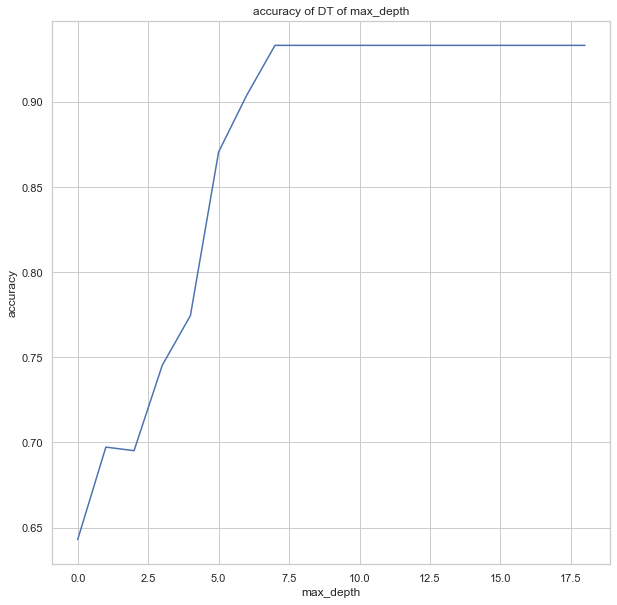

In [20]:
max_depth_accuracy = []
for a in range(1, 20):
    clf = DecisionTree(feature_types=['categorical'] * X2.shape[1], max_depth=a)
    clf.fit(X_train, y_train)
    max_depth_accuracy.append(accuracy_score(y_true=y_test, y_pred=clf.predict(X_test)))
plt.figure(figsize=(10, 10))
plt.plot(max_depth_accuracy)
plt.title('accuracy of DT of max_depth')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show()

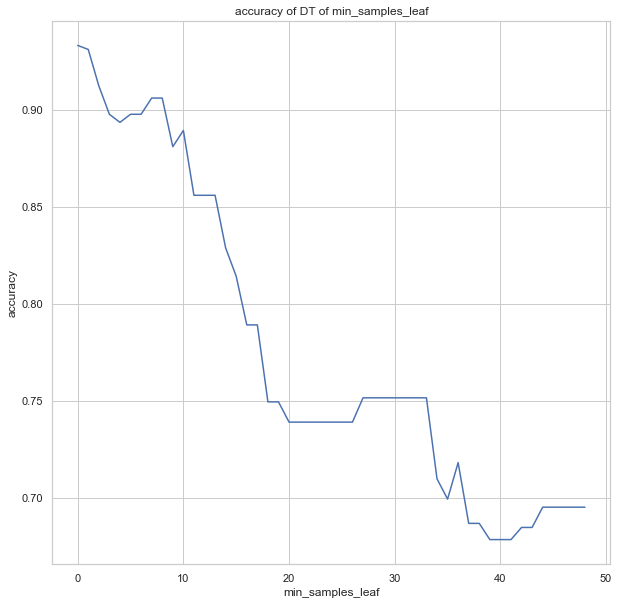

In [21]:
min_samples_leaf_accuracy = []
for a in range(1, 50):
    clf = DecisionTree(feature_types=['categorical'] * X2.shape[1], min_samples_leaf=a)
    clf.fit(X_train, y_train)
    min_samples_leaf_accuracy.append(accuracy_score(y_true=y_test, y_pred=clf.predict(X_test)))
plt.figure(figsize=(10, 10))
plt.plot(min_samples_leaf_accuracy)
plt.title('accuracy of DT of min_samples_leaf')
plt.xlabel('min_samples_leaf')
plt.ylabel('accuracy')
plt.show()

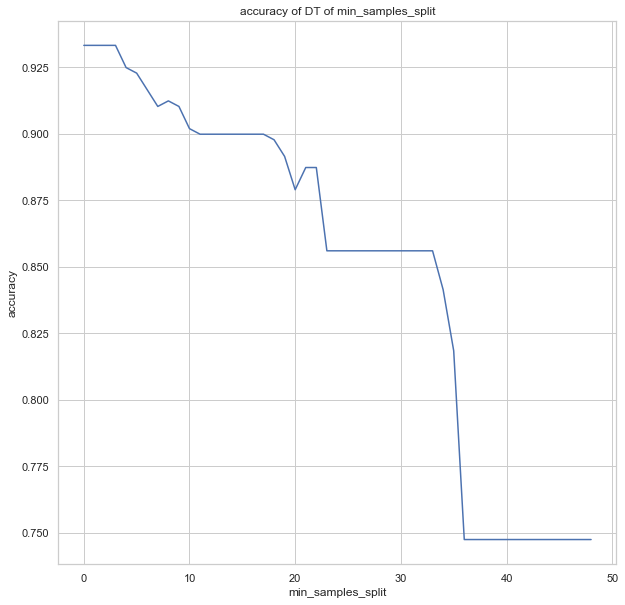

In [22]:
min_samples_split_accuracy = []
for a in range(1, 50):
    clf = DecisionTree(feature_types=['categorical'] * X2.shape[1], min_samples_split=a)
    clf.fit(X_train, y_train)
    min_samples_split_accuracy.append(accuracy_score(y_true=y_test, y_pred=clf.predict(X_test)))
plt.figure(figsize=(10, 10))
plt.plot(min_samples_split_accuracy)
plt.title('accuracy of DT of min_samples_split')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.show()

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [23]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df1 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', header=None)
df2 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data', header=None)
df3 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', header=None)
df4 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data', header=None)

In [24]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

X1 = pd.DataFrame()
for col in range(1, df1.shape[1]):
    X1[col] = enc.fit_transform(df1[col])
X1 = np.array(X1)
y1 = enc.fit_transform(df1[0])

X2 = pd.DataFrame()
for col in range(0, df2.shape[1] - 1):
    X2[col] = enc.fit_transform(df2[col])
X2 = np.array(X2)
y2 = np.array(((df2[df2.shape[1] - 1]) == 'positive').astype(int)) 
#кстати, если тут не ставить np.array, то почему-то все падает
#хотя вроде pd.series и np.array полностью согласованы...

X3 = pd.DataFrame()
for col in range(0, df3.shape[1] - 1):
    X3[col] = enc.fit_transform(df3[col])
X3 = np.array(X3)
y3 = np.array(((df3[df3.shape[1] - 1] == 'good') | (df3[df3.shape[1] - 1] == 'vgood')).astype(int))

X4 = pd.DataFrame()
for col in range(0, df4.shape[1] - 1):
    X4[col] = enc.fit_transform(df4[col])
X4 = np.array(X4)
y4 = np.array(((df4[df4.shape[1] - 1] == 'very_recom') |
      (df4[df4.shape[1] - 1] == 'priority') | 
      (df4[df4.shape[1] - 1] == 'spec_prior')).astype(int))

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.preprocessing import OneHotEncoder

In [42]:
ans = pd.DataFrame()
cvs1 = cross_val_score(DecisionTree(feature_types=['real'] * X1.shape[1]), X1, y1, cv=10, scoring=make_scorer(accuracy_score)).mean()
cvs2 = cross_val_score(DecisionTree(feature_types=['real'] * X2.shape[1]), X2, y2, cv=10, scoring=make_scorer(accuracy_score)).mean()
cvs3 = cross_val_score(DecisionTree(feature_types=['real'] * X3.shape[1]), X3, y3, cv=10, scoring=make_scorer(accuracy_score)).mean()
cvs4 = cross_val_score(DecisionTree(feature_types=['real'] * X4.shape[1]), X4, y4, cv=10, scoring=make_scorer(accuracy_score)).mean()
ans['DT with real'] = [cvs1, cvs2, cvs3, cvs4]

In [43]:
cvs1 = cross_val_score(DecisionTree(feature_types=['categorical'] * X1.shape[1]), X1, y1, cv=10, scoring=make_scorer(accuracy_score)).mean()
cvs2 = cross_val_score(DecisionTree(feature_types=['categorical'] * X2.shape[1]), X2, y2, cv=10, scoring=make_scorer(accuracy_score)).mean()
cvs3 = cross_val_score(DecisionTree(feature_types=['categorical'] * X3.shape[1]), X3, y3, cv=10, scoring=make_scorer(accuracy_score)).mean()
cvs4 = cross_val_score(DecisionTree(feature_types=['categorical'] * X4.shape[1]), X4, y4, cv=10, scoring=make_scorer(accuracy_score)).mean()
ans['DT with categorical'] = [cvs1, cvs2, cvs3, cvs4]

In [44]:
ohe = OneHotEncoder(sparse=False)
X1_ = ohe.fit_transform(X1)
X2_ = ohe.fit_transform(X2)
X3_ = ohe.fit_transform(X3)
X4_ = ohe.fit_transform(X4)

In [45]:
cvs1 = cross_val_score(DecisionTree(feature_types=['real'] * X1_.shape[1]), X1_, y1, cv=10, scoring=make_scorer(accuracy_score)).mean()
cvs2 = cross_val_score(DecisionTree(feature_types=['real'] * X2_.shape[1]), X2_, y2, cv=10, scoring=make_scorer(accuracy_score)).mean()
cvs3 = cross_val_score(DecisionTree(feature_types=['real'] * X3_.shape[1]), X3_, y3, cv=10, scoring=make_scorer(accuracy_score)).mean()
cvs4 = cross_val_score(DecisionTree(feature_types=['real'] * X4_.shape[1]), X4_, y4, cv=10, scoring=make_scorer(accuracy_score)).mean()
ans['DT with OHE'] = [cvs1, cvs2, cvs3, cvs4]

In [46]:
from sklearn.tree import DecisionTreeClassifier
cvs1 = cross_val_score(DecisionTreeClassifier(), X1, y1, cv=10, scoring=make_scorer(accuracy_score)).mean()
cvs2 = cross_val_score(DecisionTreeClassifier(), X2, y2, cv=10, scoring=make_scorer(accuracy_score)).mean()
cvs3 = cross_val_score(DecisionTreeClassifier(), X3, y3, cv=10, scoring=make_scorer(accuracy_score)).mean()
cvs4 = cross_val_score(DecisionTreeClassifier(), X4, y4, cv=10, scoring=make_scorer(accuracy_score)).mean()
ans['DTC from sklearn'] = [cvs1, cvs2, cvs3, cvs4]

In [47]:
ans.index = ['mushrooms', 'tic-tac-toe', 'cars', 'nursery']
ans

,DT with real,DT with categorical,DT with OHE,DTC from sklearn
mushrooms,0.999261,1.000000,0.999631,0.965556
tic-tac-toe,0.468575,0.541458,0.547730,0.759189
cars,0.942647,0.967546,0.919495,0.943285
nursery,0.999691,0.999846,0.999537,0.999691


In [28]:
# Это для дебага, не обращай внимания
#X_t = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1]])
#y_t = np.array([0, 1, 0, 1])
fv = np.array([0, 1, 3, 2])
tv = np.array([0, 1, 0, 1])
find_best_split(fv, tv)
#dt = DecisionTree(feature_types=['real'] * X_t.shape[1])
#dt.fit(X_t, y_t)

True


(array([0.5, 1.5, 2.5]),
 array([-0.33333333, -0.5       , -0.33333333]),
 0.5,
 -0.3333333333333333)

__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**
mushrooms. Тут все алгоритмы, кроме sklearовского показали accuracy~1, видимо потому что последний просто оптимизирован и за скорость расплачивается небольшой ошибкой (ну там прунинг, все дела). Почему остальные 3 сработали одинаково хорошо? Навеное, потому что признаки все были примерно бинарные. Ну то есть у них было мало значений, но даже это мало могло бинаризоваться (ну т.е. например, цвета белый, желтый, черный, синий можно разбить на желтый, белый и синий, черный без потери качества). В этом случае все методы работают, как OHE. И видимо выборка хорошо разделима, поэтому качество 1 почти достижимо. Улучшить качество вряд ли получится (ну у последнего можно, ослабив регуляризацию и прунинг, но скажется на сокрости), разве что попытаться делать быстрее, это, думаю, можно. Случайности тут не особо есть, выборка вполне разделима.

tic-tac-toe. Вообще это очень сложный для разбиения по признакам датасет. Каждая конфигурация игры по сути это отдельный признак. Поэтому скорее всего модель тупо переобучилась. Об этом говорит accuracy~0.5 на рукописных деревьях. Ну и объектов мало было (1000). Опять же, везде 3 признака, поэтому OHE и categorical работают одинакого. А вот real работает хуже рандомного. Ну sklearnовские деревья видимо как-то научены не переобучаться, поэтому там 0.75 аж получилось. Ну логично, я свои не регуляризировал. Тут очевидно можно улучшить их работу регуляризацией. На сколько можно сделать лучше 0.75 не ясно, так как данных мало, а признаки "одинаковые" по силе, в каком-то смысле симметричные, модели это сложно увидеть. Какая здесь случайность? Тут же тупо все конфигурацие, какая случайность-то лол?

cars. Ну тут весьма комфортный для деревьев датасет. Все признаки упорядочены (low, medium, high), поэтому real и categorical справились хорошо (т.к. их всего 3-4 categorical и real работают примерно одинакого, но первый чуть круче, т.к. признаки все таки категориальные). А вот OHE, мне кажется, переобучился (так как с уникальным набором OHE признаков достаточно мало объектов). Так как данных не так уж и много, а вот плюшек OHE, как я выше объяснил, дает не сильно много, хотя в разы увеличивает кол-во признаков. sklearnовские деревья опять лучше всех, но не сильно. Думаю, их показатели улучшить уже будет сложно. А вот наши деревья можно опять же зарегуляризовать, особенно OHE. Т.е. глубину тут особо смысла нет ограничивать вроде, а вот min_leaf можно поставить. Тут, конечно, много случайностей, поскольку машины ну ооочень разные, а признаков очень мало, ну и они такие, не прям сильные.

nursery. Здесь у всех алгоритмов аккураси около 1, улучшать некуда. Почему так? Потому что признаки очень сильные. Ясен пень, что если злоровье плохое или социальное положение у семьи проблемное, то скорее всего ребенка не возьмут (или наоборот возьмут, я не социолог, хз, какие там законы). Но факт в том, что каждый признак сам по себе очень сильный и уже он один с неплохим аккураси может разделить выборку. Здесь поскольку выборка разделима случайностей мало.

Вставьте что угодно, описывающее ваши впечатления от этого задания:

Каеф, наконец на домашку потратил меньше 15 часов, люблю жизнь
Это я писал до того, как закинуть в контест. Потом я просрал еще столько же(
Не люблю жизнь(

Кстати, одна из ошибок в реализации дерева была большая буква вместо маленькой в слове categorical. Советую сделать русскую букву с вместо английской c.